In [1]:
# Load necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing warnings, suppresing all warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the background of the plots to white
sns.set_style('whitegrid')

In [3]:
# Read the data files
df = pd.read_csv('insurance_data.csv')

In [4]:
# Display the data frame
# First 10 rows
df.head(10)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,11-Aug
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,11-Aug
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,11-Aug
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,11-Aug
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,11-Sep
5,1,1,1,36,M,2,3,A,Monthly,Lapse,40000.0,NO NLG,0.0,0,0.0,N,7.916667,8,336.0,11-Sep
6,1,1,1,50,F,2,3,A,Monthly,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.916667,8,537.0,11-Sep
7,1,1,5,42,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,200.0,11-Sep
8,1,1,2,37,M,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,82.0,11-Oct
9,1,1,3,34,F,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,73.0,11-Oct


In [5]:
# Get the shape of the data frame
df.shape

(185560, 20)

In [6]:
# Get the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185560 entries, 0 to 185559
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CHANNEL1                   185560 non-null  int64  
 1   CHANNEL2                   185560 non-null  int64  
 2   CHANNEL3                   185560 non-null  int64  
 3   ENTRY AGE                  185560 non-null  int64  
 4   SEX                        185560 non-null  object 
 5   POLICY TYPE 1              185560 non-null  int64  
 6   POLICY TYPE 2              185560 non-null  int64  
 7   POLICY TYPE 3              185560 non-null  object 
 8   PAYMENT MODE               185560 non-null  object 
 9   POLICY STATUS              185560 non-null  object 
 10  BENEFIT                    161896 non-null  float64
 11  NON LAPSE GUARANTEED       185560 non-null  object 
 12  SUBSTANDARD RISK           185560 non-null  float64
 13  NUMBER OF ADVANCE PREMIUM  18

In [7]:
# Get the columns of the dataset
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date'],
      dtype='object')

In [9]:
# Checking whether there is any null values
df.isnull().sum()

# As the percentages of total observations
df.isnull().sum()/df.shape[0]*100

CHANNEL1                      0.000000
CHANNEL2                      0.000000
CHANNEL3                      0.000000
ENTRY AGE                     0.000000
SEX                           0.000000
POLICY TYPE 1                 0.000000
POLICY TYPE 2                 0.000000
POLICY TYPE 3                 0.000000
PAYMENT MODE                  0.000000
POLICY STATUS                 0.000000
BENEFIT                      12.752748
NON LAPSE GUARANTEED          0.000000
SUBSTANDARD RISK              0.000000
NUMBER OF ADVANCE PREMIUM     0.000000
INITIAL BENEFIT               0.000000
Full Benefit?                 0.000000
Policy Year (Decimal)         0.000000
Policy Year                   0.000000
Premium                      41.564454
Issue Date                    0.000000
dtype: float64

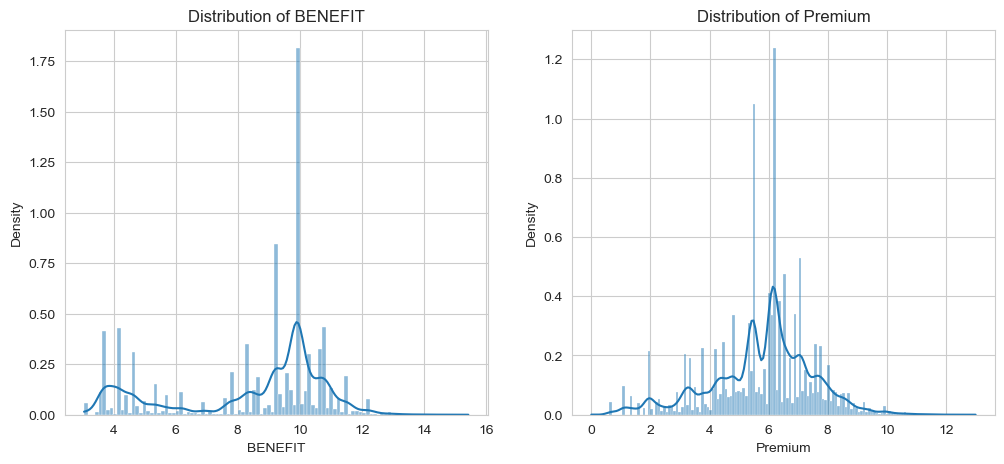

In [15]:
# For missing value, we can do imputation
# Before that, we check the distribution of BENEFIT and Premium
# Hard to see
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(np.log1p(df['BENEFIT']), kde=True, stat='density')
plt.title('Distribution of BENEFIT')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['Premium']), kde=True, stat='density')
plt.title('Distribution of Premium')
plt.show()

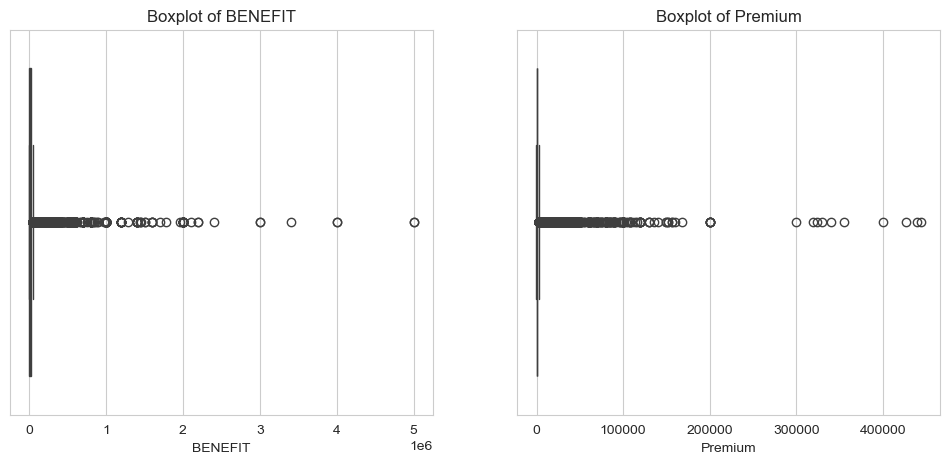

In [ ]:
# Plot the boxplot to see the outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=(df['BENEFIT']))
plt.title('Boxplot of BENEFIT')

plt.subplot(1,2,2)
sns.boxplot(x=(df['Premium']))
plt.title('Boxplot of Premium')
plt.show()

In [17]:
# The data is very skewed to the right (contains outliers)
# For imputation, we can use median to fill in the missing values
df['BENEFIT'].fillna(df['BENEFIT'].median(), inplace=True)
df['Premium'].fillna(df['Premium'].median(), inplace=True)

In [18]:
# Check for missing values as verification
df.isnull().sum().sum()

np.int64(0)

In [21]:
# Check for duplicates (in percentages)
df.duplicated().sum()/df.shape[0]*100 

np.float64(6.404936408708774)

In [23]:
# Since the duplicates are very minimal, we can drop them
df.drop_duplicates(inplace=True)

# Then check the shape again
df.shape

(173675, 20)

In [ ]:
# After simple data cleaning
# We check the number of lapse
df['POLICY STATUS'].value_counts()

POLICY STATUS
Lapse        91316
Inforce      62134
Surrender    19580
Death          511
Expired        134
Name: count, dtype: int64

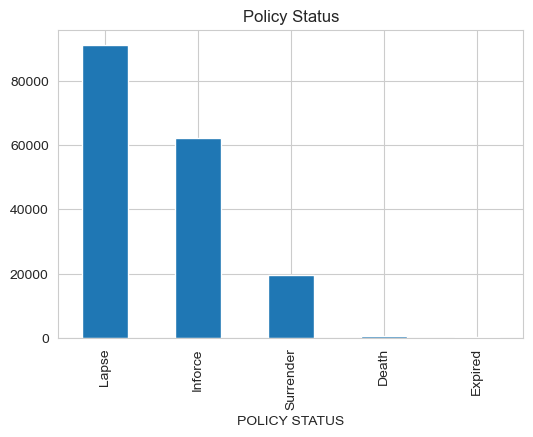

In [ ]:
# Plot the counts
plt.figure(figsize=(6,4))
df['POLICY STATUS'].value_counts().plot(kind='bar')
plt.title('Policy Status')
plt.show()

# We only focus on VOLUNTARY lapse rate, including Lapse and Surrender
# We recategorize them into Lapse and Non-Lapse

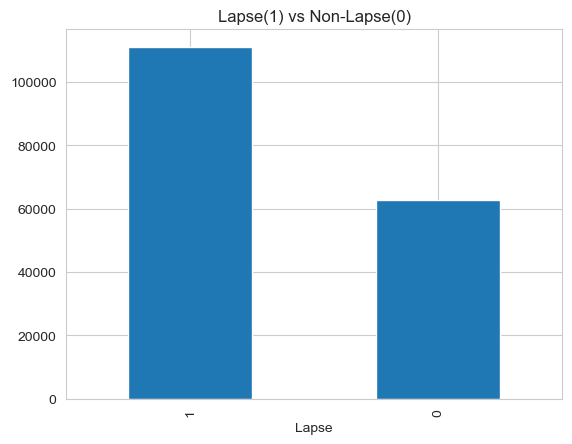

In [33]:
# Grouping for analysis
mapping = {
    'Lapse': 1,
    'Surrender': 1,
    'Inforce': 0,
    'Death': 0,
    'Expired': 0
}

df['Lapse'] = df['POLICY STATUS'].map(mapping)
df['Lapse'].value_counts().plot(kind='bar')
plt.title('Lapse(1) vs Non-Lapse(0)')
plt.show()

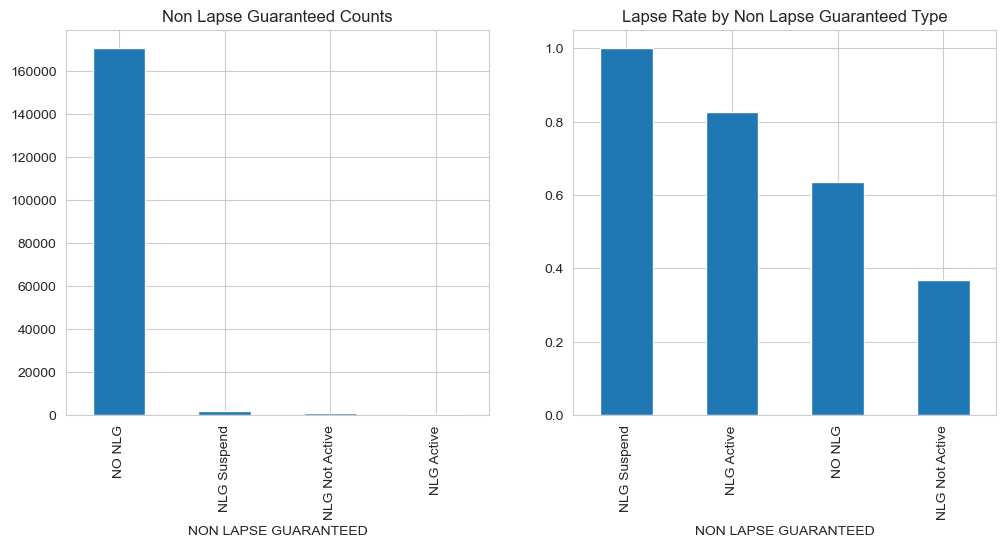

In [ ]:
# Non Lapse Guaranteed counts
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['NON LAPSE GUARANTEED'].value_counts().plot(kind='bar')
plt.title('Non Lapse Guaranteed Counts')

plt.subplot(1,2,2)
lapse_by_type = df.groupby('NON LAPSE GUARANTEED')['Lapse'].mean().sort_values(ascending=False)
lapse_by_type.plot(kind='bar')
plt.title('Lapse Rate by Non Lapse Guaranteed Type')
plt.show()

# NLG = feature that keep policy in force even if the cash value drops to 0, 
# provided a minimum premium is paid

# Most of the NLG is NO NLG, which means that when the cash value drops to 0, the policy will lapse
# They do not have protection, and are very sensitive to market conditions/ interest rate changes
# This shows it is important to study how interest rates affects their lapse rates

# Lapse rate exist is every NLG category

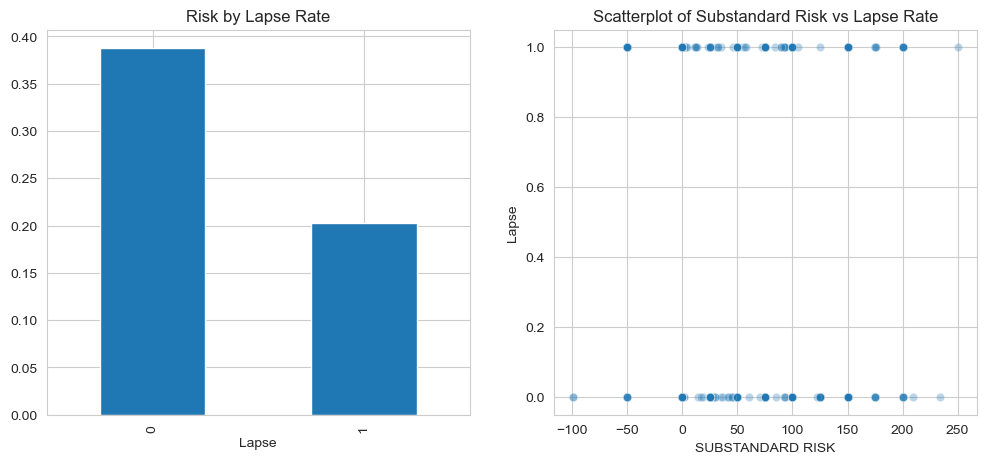

In [ ]:
# Check with Substandard Risk
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
lapse_by_risk = df.groupby('Lapse')['SUBSTANDARD RISK'].mean().sort_values(ascending=False)
lapse_by_risk.plot(kind='bar')
plt.title('Risk by Lapse Rate')

# Scatterplot
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='SUBSTANDARD RISK', y='Lapse', alpha=0.3)
plt.title('Scatterplot of Substandard Risk vs Lapse Rate')
plt.show()

# No obvious trend between Substandard Risk and Lapse Rate

In [ ]:
# I was interested in exporing the Benefit to Initial Benefit ratio
# If there is a decline in the ratio, it means that Benefit is reducing
# A strong sign of lapse risk

df['INITIAL BENEFIT'].describe()

count    173675.000000
mean        181.195332
std        3012.910204
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      266017.236800
Name: INITIAL BENEFIT, dtype: float64

<Axes: xlabel='INITIAL BENEFIT'>

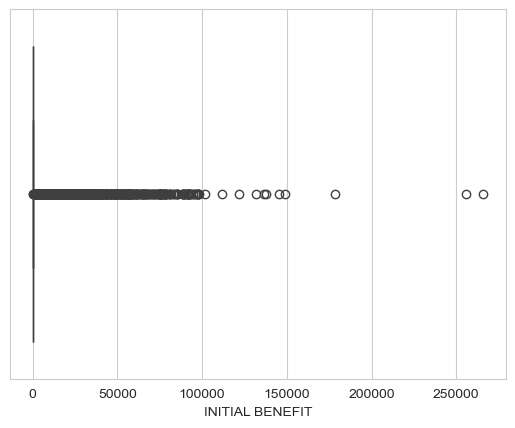

In [ ]:
sns.boxplot(x=(df['INITIAL BENEFIT']))
# The initial benefit also have outliers (a lot)
# Might not be suitable to compute the ratios for analysis

Text(0.5, 1.0, 'Lapse Rate by Full Benefit coverage')

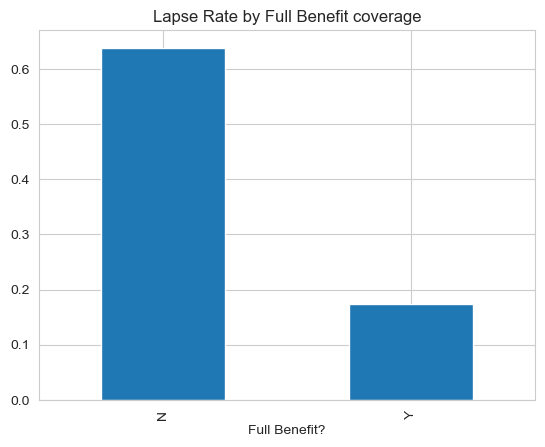

In [ ]:
# Check with Full Benefit?
lapse_by_risk = df.groupby('Full Benefit?')['Lapse'].mean().sort_values(ascending=False)
lapse_by_risk.plot(kind='bar')
plt.title('Lapse Rate by Full Benefit coverage')

# Full Benefit coverage have lower lapse rate   

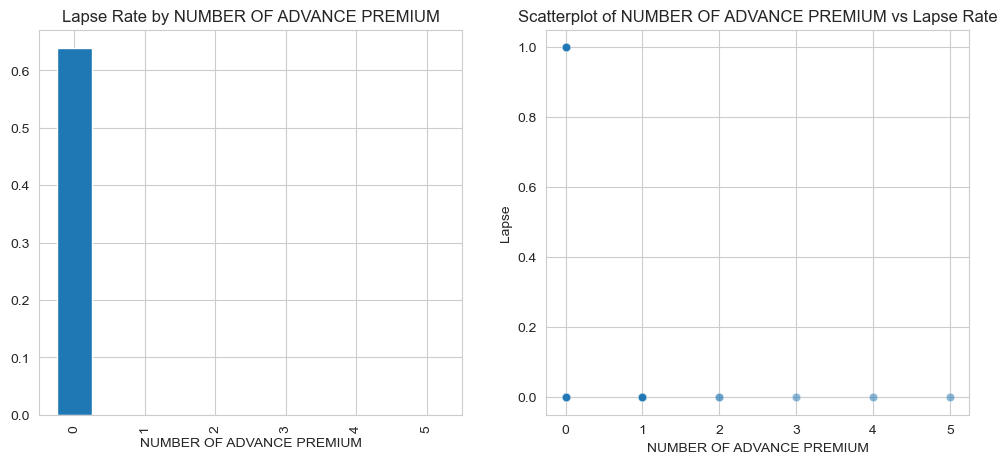

In [ ]:
# Check with NUMBER OF ADVANCE PREMIUM?
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
lapse_by_advance = df.groupby('NUMBER OF ADVANCE PREMIUM')['Lapse'].mean().sort_values(ascending=False)
lapse_by_advance.plot(kind='bar')
plt.title('Lapse Rate by NUMBER OF ADVANCE PREMIUM')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='NUMBER OF ADVANCE PREMIUM', y='Lapse', alpha=0.3)
plt.title('Scatterplot of NUMBER OF ADVANCE PREMIUM vs Lapse Rate')
plt.show()

# Individuals who do advance premiums do not lapse

In [58]:
df['NUMBER OF ADVANCE PREMIUM'].value_counts()

NUMBER OF ADVANCE PREMIUM
0    173602
1        64
2         3
5         2
3         2
4         2
Name: count, dtype: int64

In [ ]:
# Reformat the Issue Date into YYYY-MM-01 format
# Since there is no actual issue date, we assume the day to be 1
df['Issue Date'] = pd.to_datetime(df['Issue Date'], format='%y-%b')

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,...,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,STATUS_GROUP,Lapse
0,1,1,1,36,F,1,1,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,280.0,2011-08-01,Non-Lapse,0
1,1,1,1,42,M,1,2,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,200.0,2011-08-01,Non-Lapse,0
2,1,1,2,40,M,2,3,A,Annually,Lapse,...,0.0,0,0.0,N,8.000000,9,1289.0,2011-08-01,Lapse,1
3,1,1,3,39,M,1,2,A,Monthly,Lapse,...,0.0,0,0.0,N,8.000000,9,216.0,2011-08-01,Lapse,1
4,1,1,4,44,M,1,2,A,Annually,Lapse,...,0.0,0,0.0,N,7.916667,8,140.0,2011-09-01,Lapse,1


In [ ]:
# Adding a new column to compute the actual ending date of the policy
from dateutil.relativedelta import relativedelta

# Function to calculate the current policy date
def calculate_dates(row):
    issue_date = row['Issue Date']
    decimal_year = row['Policy Year (Decimal)']
    
    # Calculate whole years and remaining decimal for months
    years = int(decimal_year)
    remaining_months_decimal = (decimal_year - years) * 12
    months = round(remaining_months_decimal)
    
    # Compute the "Effective Date" represented by this row
    current_eval_date = issue_date + relativedelta(years=years, months=months)

    return current_eval_date

df['Current Policy Date'] = df.apply(calculate_dates, axis=1)
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,...,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,STATUS_GROUP,Lapse,Current Policy Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,...,0,0.0,N,8.000000,9,280.0,2011-08-01,Non-Lapse,0,2019-08-01
1,1,1,1,42,M,1,2,A,Annually,Inforce,...,0,0.0,N,8.000000,9,200.0,2011-08-01,Non-Lapse,0,2019-08-01
2,1,1,2,40,M,2,3,A,Annually,Lapse,...,0,0.0,N,8.000000,9,1289.0,2011-08-01,Lapse,1,2019-08-01
3,1,1,3,39,M,1,2,A,Monthly,Lapse,...,0,0.0,N,8.000000,9,216.0,2011-08-01,Lapse,1,2019-08-01
4,1,1,4,44,M,1,2,A,Annually,Lapse,...,0,0.0,N,7.916667,8,140.0,2011-09-01,Lapse,1,2019-08-01


In [ ]:
df['Current Policy Date'].value_counts()
# All ending date is 2019-08-01

Current Policy Date
2019-08-01    173675
Name: count, dtype: int64

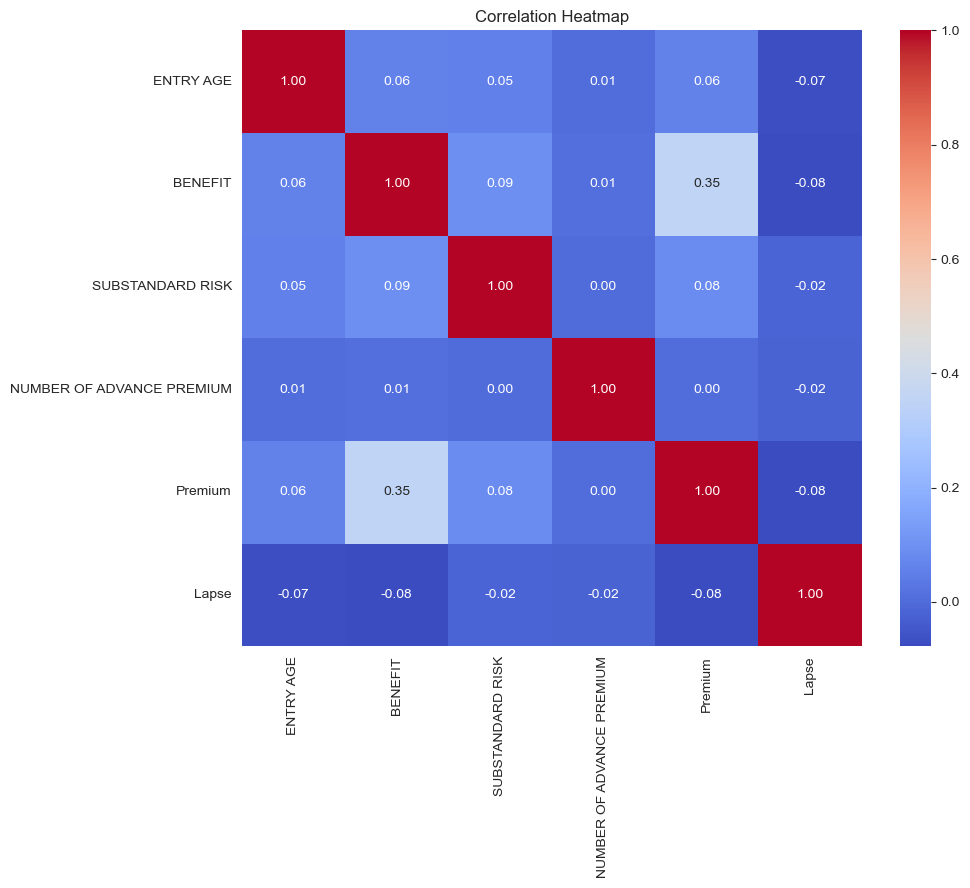

In [ ]:
# Select only relevant columns for correlation analysis
df_corr = df[['ENTRY AGE','BENEFIT','SUBSTANDARD RISK',
              'NUMBER OF ADVANCE PREMIUM','Premium','Lapse']]

# Plot a heatmap to understand the correlations
plt.figure(figsize=(10,8))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Very low correlations between features and Lapse

In [71]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'STATUS_GROUP', 'Lapse', 'Current Policy Date'],
      dtype='object')

In [ ]:
# Was thinking of only keep
# 'ENTRY AGE', 'SEX', 'PAYMENT MODE', 'POLICY STATUS',
# 'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
# 'NUMBER OF ADVANCE PREMIUM', 'Full Benefit?',
# 'Premium', 'Issue Date','Current Policy Date'
# 'Lapse' as our respond variables